# WT, RPM and RPMA allografts and organoids
### Ireland et al., 2025

Modified from [ExtFig7_RPM_RPMA_Organoid_Allo_Final_Clean.ipynb on GitHub](https://github.com/TGOliver-lab/Ireland_Basal_SCLC_2025/blob/main/Python_Code/ExtFig7_RPM_RPMA_Organoid_Allo_Final_Clean.ipynb)  

Related to Extended Data Fig. 7

In [1]:
#Import relevant packages
import numpy as np
import pandas as pd
from matplotlib import rcParams
import os
import scanpy as sc

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm # color maps
from matplotlib.pyplot import rc_context

#For nice color schemes
import cmocean

#For barplots
import seaborn as sns

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, dpi_save=300, facecolor='white')

### Load data

In [3]:
adata2 = sc.read_h5ad("../data/030525_RPM_RPMA_WT_Organoids_forCellTagwStates.h5ad")

sigs=["Basal_hillock","Luminal_hillock","prolif_basal","proteo_basal","diff_basal",
                           "krt8high","mucus_sec","ciliated","pnec","iono_tuft","smg_basal","smg_sec"]

### Plot data in UMAP

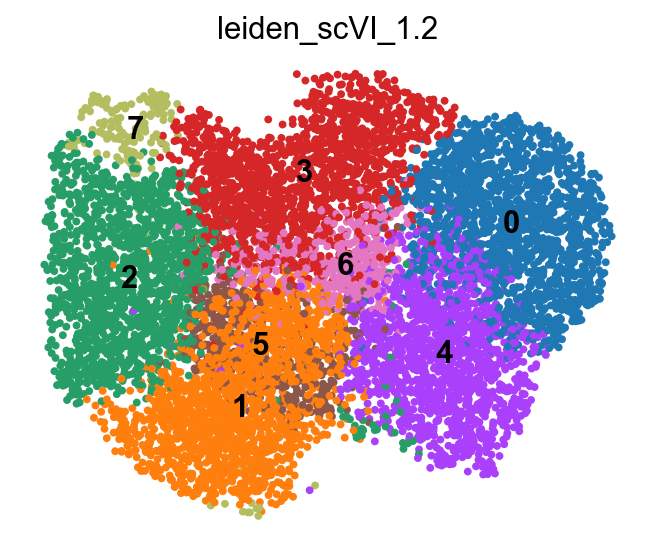

In [4]:
fig, ax = plt.subplots(figsize=(5.25, 4.5))
sc.pl.umap(adata2, color="UnID", legend_loc="right margin", ax=ax, s=50, frameon=False, save=False, 
           palette=["#005F56","purple","orange"])
fig, ax = plt.subplots(figsize=(5, 4))
sc.pl.umap(adata2, color="leiden_scVI_1.2", legend_loc="on data", ax=ax, s=50, frameon=False, save=False, ) 
  

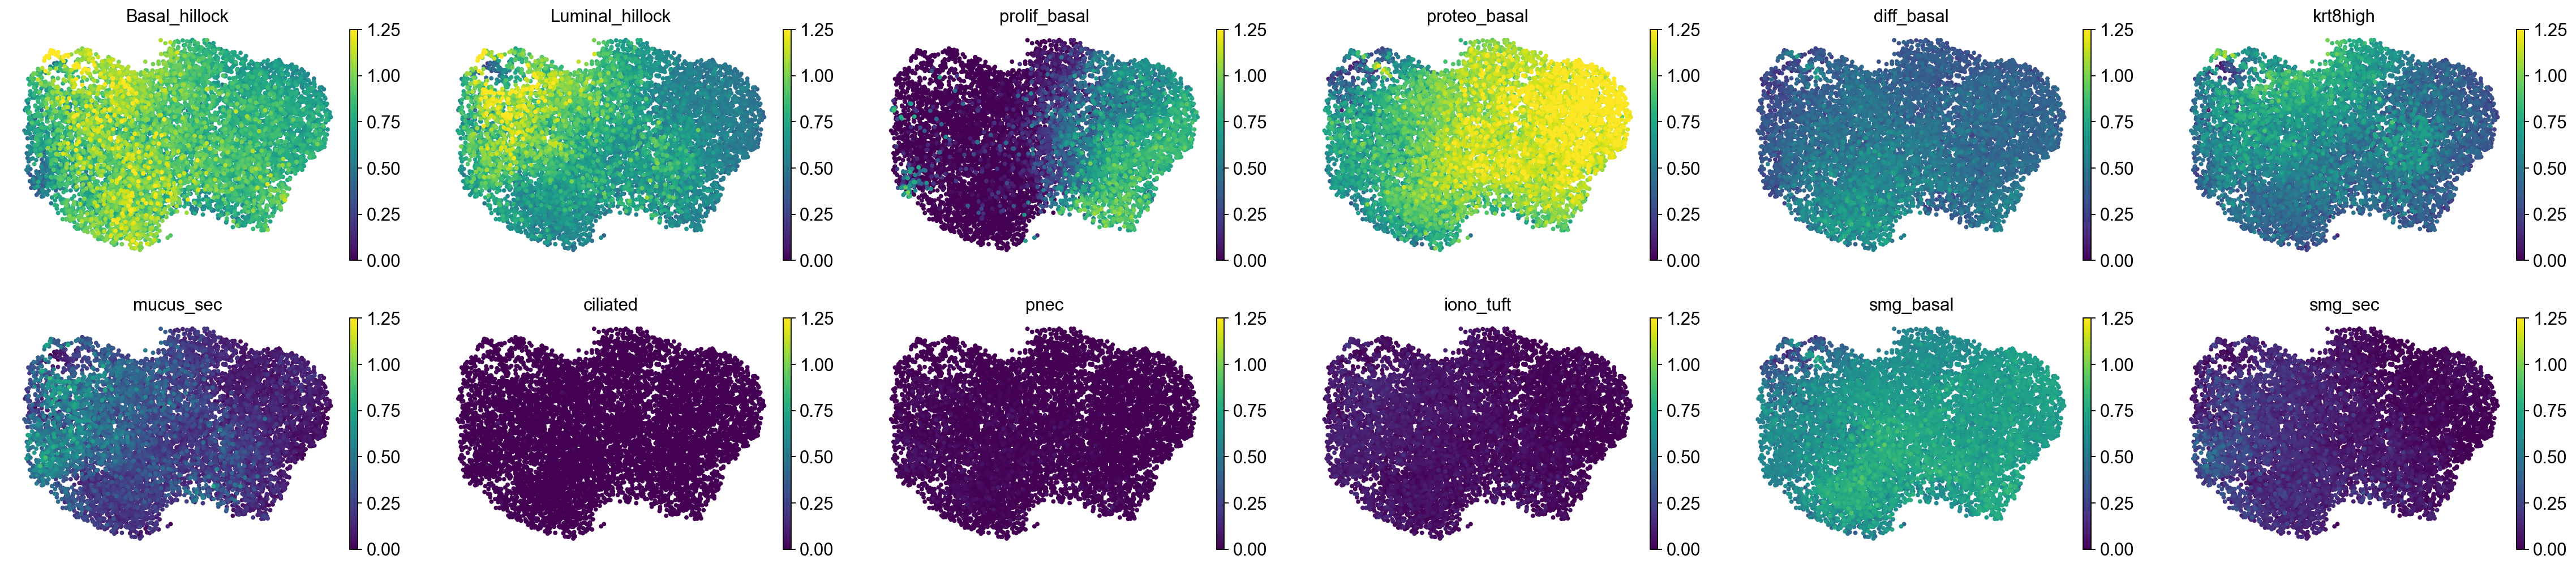

In [5]:
with rc_context({"figure.figsize": (5, 3.5)}):
    sc.pl.umap(
        adata2,
        color=sigs,
        use_raw=False,
        legend_loc= "on data",
        ncols=6,
        s=50,
        frameon=False,
        vmin="0",
        vmax="1.25",
        layer="norm",
        save=False
    )

### Show cell types

/var/folders/92/7ylp4dyx3yqgjqr8flnjz0hw0000gn/T/ipykernel_36612/2165766820.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("Dark2").colors


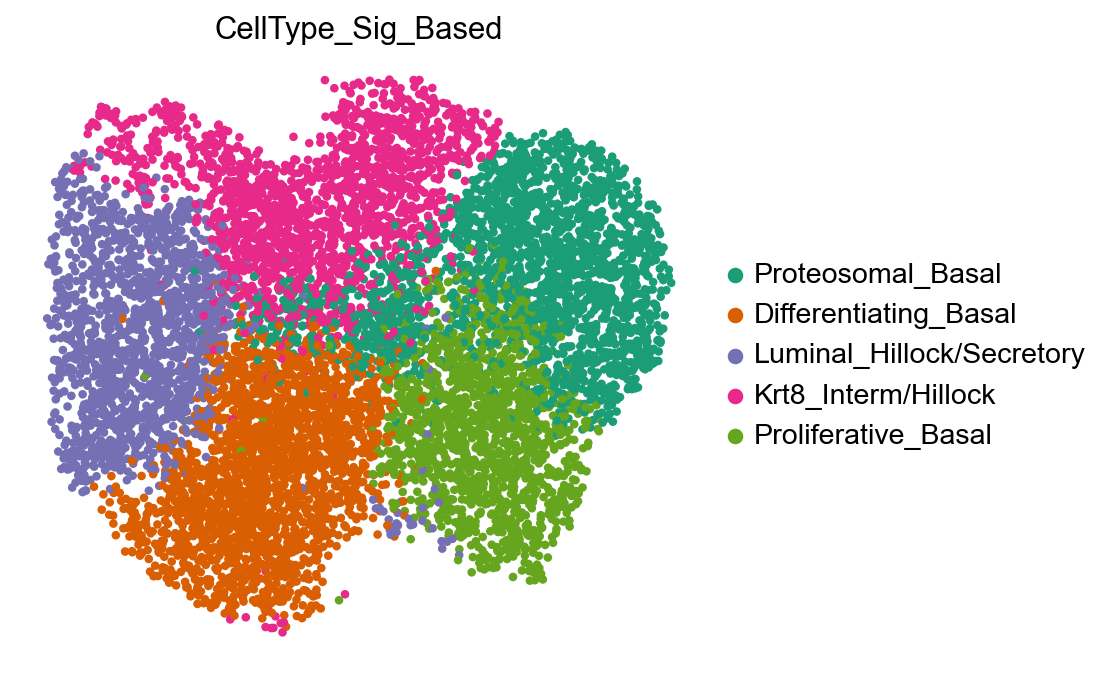

In [6]:
fig, ax = plt.subplots(figsize=(5.5, 5))
colors = cm.get_cmap("Dark2").colors 
sc.pl.umap(adata2, color="CellType_Sig_Based", legend_loc="right margin", ax=ax, s=60, frameon=False, palette=colors,save=False)

### Proportions per cluster

<Figure size 960x480 with 0 Axes>

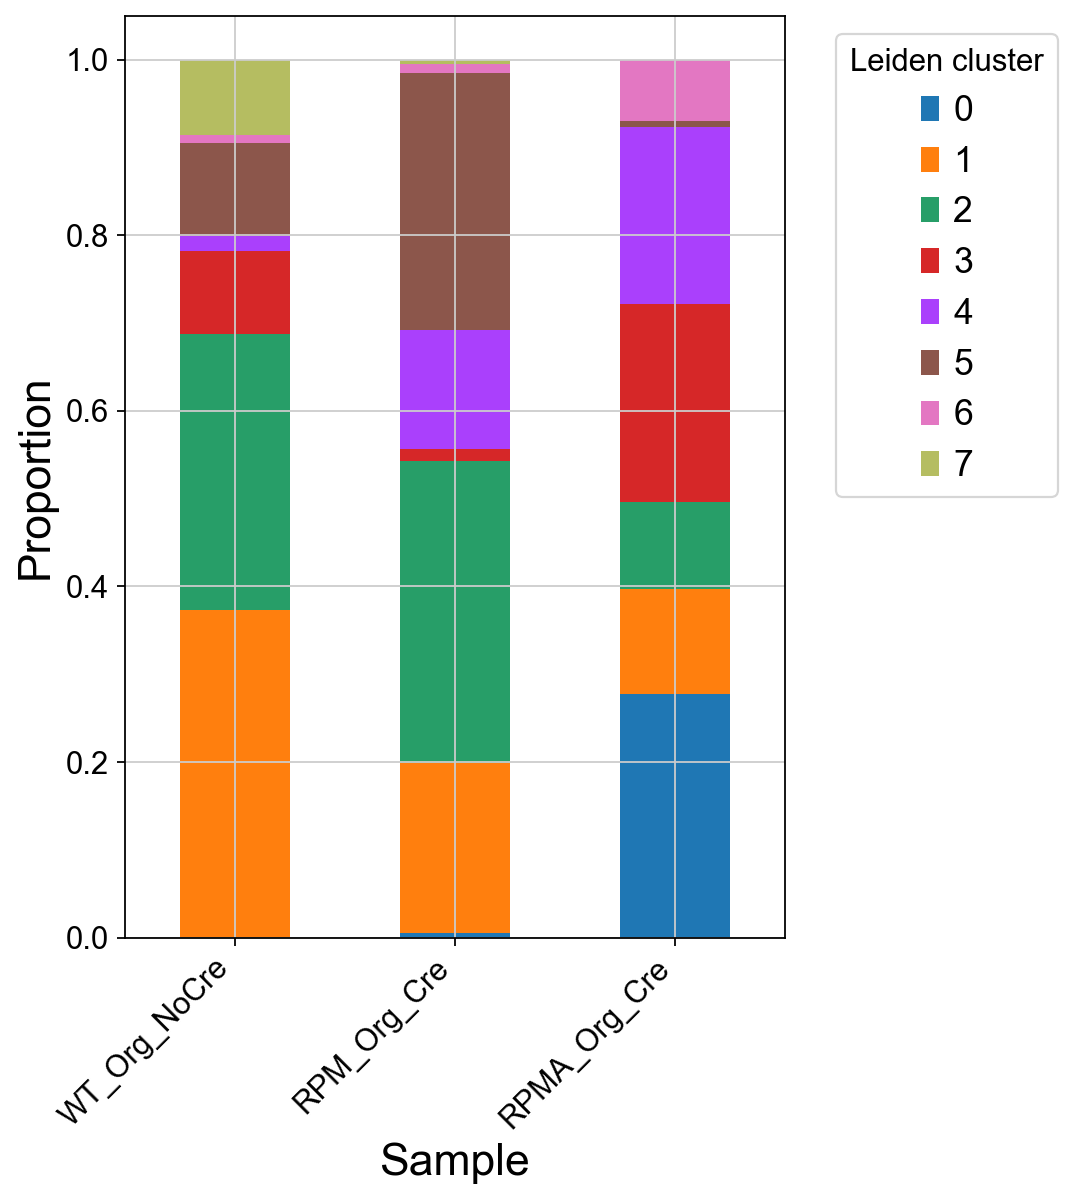

In [7]:
# Create a DataFrame for plotting
df = adata2.obs[['leiden_scVI_1.2', 'UnID']]

# Count frequencies per cluster
frequency_table = pd.crosstab(df['UnID'],df['leiden_scVI_1.2'],)

# Normalize frequencies within each cluster (optional)
frequency_table_normalized = frequency_table.div(frequency_table.sum(axis=1), axis=0)

# Plot the data
plt.figure(figsize=(12, 6))
frequency_table_normalized.plot(kind='bar', stacked=True, figsize=(7, 8))

# Customize plot
#plt.title('Leiden cluster composition per basal model', fontsize=20)
plt.xlabel('Sample', fontsize=20)
plt.ylabel('Proportion', fontsize=20)
plt.legend(title='Leiden cluster', bbox_to_anchor=(1.05, 1), fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()

### Proportions per cell type

In [8]:
df = adata2.obs[['UnID','CellType_Sig_Based']]

# Count frequencies per cluster
frequency_table = pd.crosstab(df['UnID'], df['CellType_Sig_Based'])

# Normalize frequencies within each cluster (optional)
frequency_table_normalized = frequency_table.div(frequency_table.sum(axis=1), axis=0)

# Plot the data
# Using a cmocean colormap (e.g., "deep", "balance", "thermal")
#colors = cmocean.cm.deep(np.linspace(0, 1, len(frequency_table_normalized.columns)))
colors = cm.get_cmap("Dark2").colors 

# Plot the stacked bar chart with colors
frequency_table_normalized.plot(kind='bar', stacked=True, figsize=(7, 8), color=colors)


# Customize plot
#plt.title('Frequency of Cell Type per Basal Model', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.ylabel('Proportion', fontsize=20)
plt.legend(title='Cell type', bbox_to_anchor=(1.05, 1), fontsize=14)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')


/var/folders/92/7ylp4dyx3yqgjqr8flnjz0hw0000gn/T/ipykernel_36612/1436201662.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("Dark2").colors


(array([0, 1, 2]),
 [Text(0, 0, 'WT_Org_NoCre'),
  Text(1, 0, 'RPM_Org_Cre'),
  Text(2, 0, 'RPMA_Org_Cre')])